# 📊 Prodigy InfoTech Data Science Internship  

### 📝 Task-05: US Traffic Accident Data Analysis  

**Intern:** Hashir Muhammed  
**Track:** Data Science  
**Task Code:** PRODIGY_DS_05  

---  

## 🎯 Task Objective  
Analyze US traffic accident data to identify patterns related to road conditions, weather conditions, and time of day.  
Visualize accident hotspots and contributing factors.  

**Dataset Source:** [US Accidents (2016-2023)](https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents)  

---  

### 🛠️ Tools Used  
- Python  
- Pandas  
- NumPy  
- Matplotlib  
- Seaborn  
- Folium  

---

# 📥 Step 1: Import Required Libraries

In [2]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Geographical Map Plotting
# import folium
# from folium.plugins import HeatMap


# 📑 Step 2: Load and Inspect the Dataset

In [3]:
# Load the dataset
df = pd.read_csv("US_Accidents.csv")

In [5]:
# Check the shape
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")


Rows: 7728394, Columns: 46


In [6]:
# Display dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [7]:
# View sample records
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


# 🧹 Step 3: Missing Data Check

In [8]:
# Check missing values per column
missing_percentage = (df.isna().sum() / len(df)) * 100
missing_percentage[missing_percentage > 0].sort_values(ascending=False)


End_Lat                  44.029355
End_Lng                  44.029355
Precipitation(in)        28.512858
Wind_Chill(F)            25.865904
Wind_Speed(mph)           7.391355
Visibility(mi)            2.291524
Wind_Direction            2.267043
Humidity(%)               2.253301
Weather_Condition         2.244438
Temperature(F)            2.120143
Pressure(in)              1.820288
Weather_Timestamp         1.555666
Sunrise_Sunset            0.300787
Civil_Twilight            0.300787
Nautical_Twilight         0.300787
Astronomical_Twilight     0.300787
Airport_Code              0.292881
Street                    0.140637
Timezone                  0.101030
Zipcode                   0.024779
City                      0.003274
Description               0.000065
dtype: float64

# 📊 Bar Plot of Missing Values

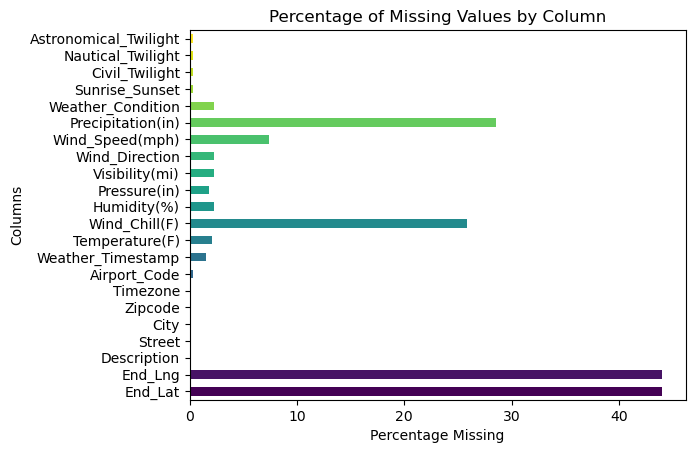

In [9]:
colors = plt.cm.viridis(np.linspace(0, 1, len(missing_percentage[missing_percentage != 0])))
missing_percentage[missing_percentage != 0].plot(kind="barh", color=colors)
plt.title("Percentage of Missing Values by Column")
plt.xlabel("Percentage Missing")
plt.ylabel("Columns")
plt.show()


# 📌 Step 4: Data Cleaning

In [11]:
# Drop unnecessary columns for EDA focus
df_clean = df[['City', 'Start_Time', 'Start_Lat', 'Start_Lng', 'Temperature(F)', 'Weather_Condition']].copy()

In [12]:
# Drop rows with nulls in selected important columns
df_clean.dropna(subset=['City', 'Start_Time', 'Start_Lat', 'Start_Lng'], inplace=True)

In [13]:
# Convert Start_Time to datetime
df_clean['Start_Time'] = pd.to_datetime(df_clean['Start_Time'], errors='coerce')

# 📊 Step 5: Exploratory Data Analysis (EDA)

## 📈 Top 20 Cities with Most Accidents


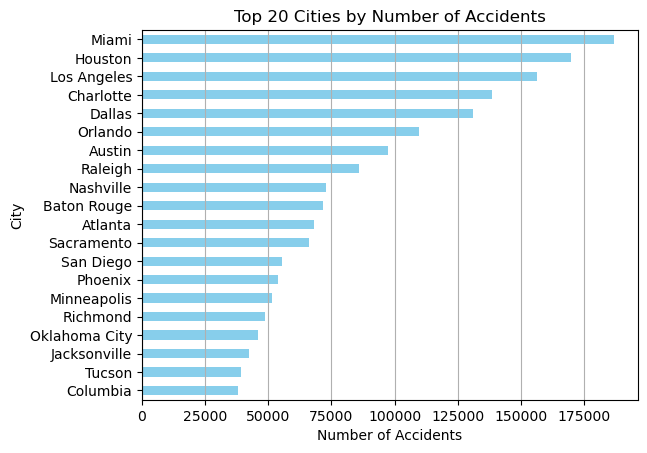

In [14]:
top_cities = df_clean['City'].value_counts().head(20)
top_cities.plot(kind='barh', color='skyblue')
plt.title("Top 20 Cities by Number of Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("City")
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()


## 📈 Accident Frequency by Hour of the Day

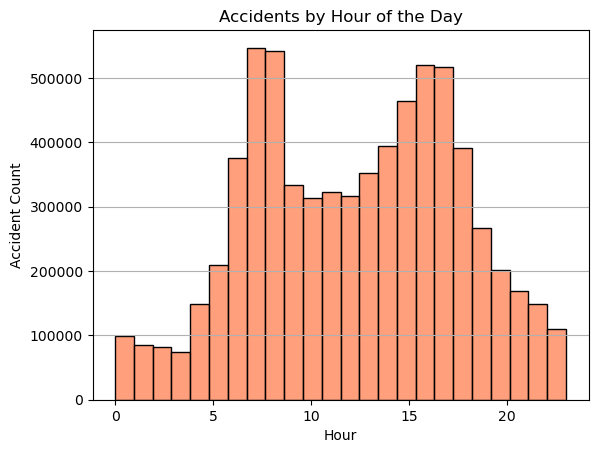

In [15]:
sns.histplot(df_clean['Start_Time'].dt.hour, bins=24, kde=False, color='coral')
plt.title("Accidents by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Accident Count")
plt.grid(axis='y')
plt.show()


## 📊 Accident Frequency by Day of the Week

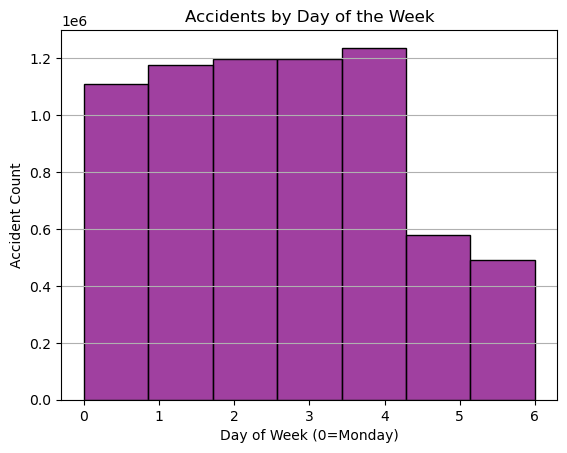

In [16]:
sns.histplot(df_clean['Start_Time'].dt.dayofweek, bins=7, kde=False, color='purple')
plt.title("Accidents by Day of the Week")
plt.xlabel("Day of Week (0=Monday)")
plt.ylabel("Accident Count")
plt.grid(axis='y')
plt.show()


## 📈 Temperature Distribution during Accidents

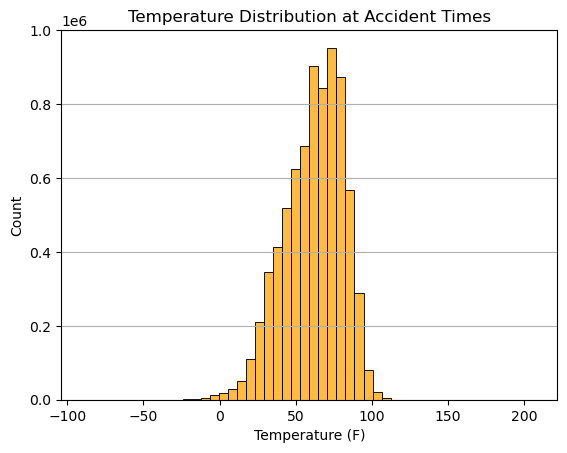

In [17]:
sns.histplot(df_clean['Temperature(F)'].dropna(), bins=50, color='orange')
plt.title("Temperature Distribution at Accident Times")
plt.xlabel("Temperature (F)")
plt.ylabel("Count")
plt.grid(axis='y')
plt.show()


# 📈 Step 7: Weather Condition Impact Analysis

## 📊 Top 10 Weather Conditions during Accidents

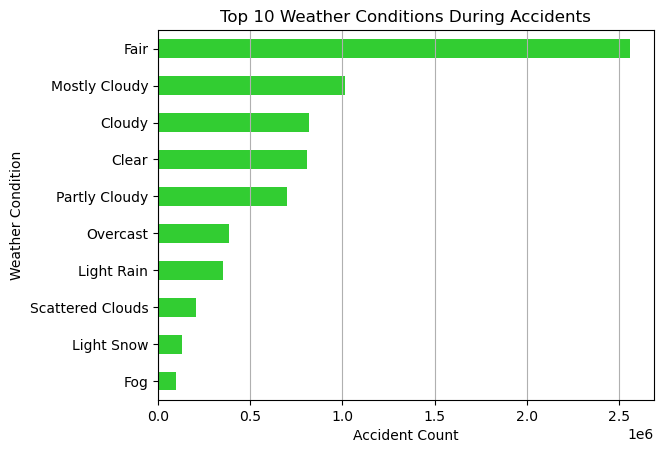

In [18]:
top_weather = df_clean['Weather_Condition'].value_counts().head(10)
top_weather.plot(kind='barh', color='limegreen')
plt.title("Top 10 Weather Conditions During Accidents")
plt.xlabel("Accident Count")
plt.ylabel("Weather Condition")
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()


## 📊 Step 8: Heatmap — Hour vs. Day Accident Frequency

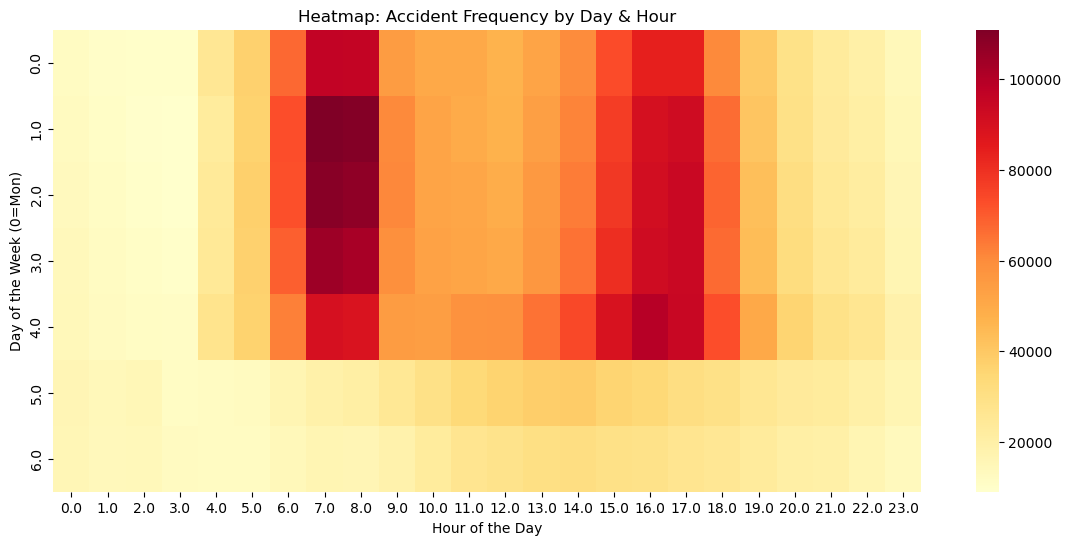

In [19]:
heatmap_data = pd.crosstab(df_clean['Start_Time'].dt.dayofweek, df_clean['Start_Time'].dt.hour)

plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap='YlOrRd')
plt.title("Heatmap: Accident Frequency by Day & Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week (0=Mon)")
plt.show()


## 📊 Donut Chart — Top 5 Weather Conditions

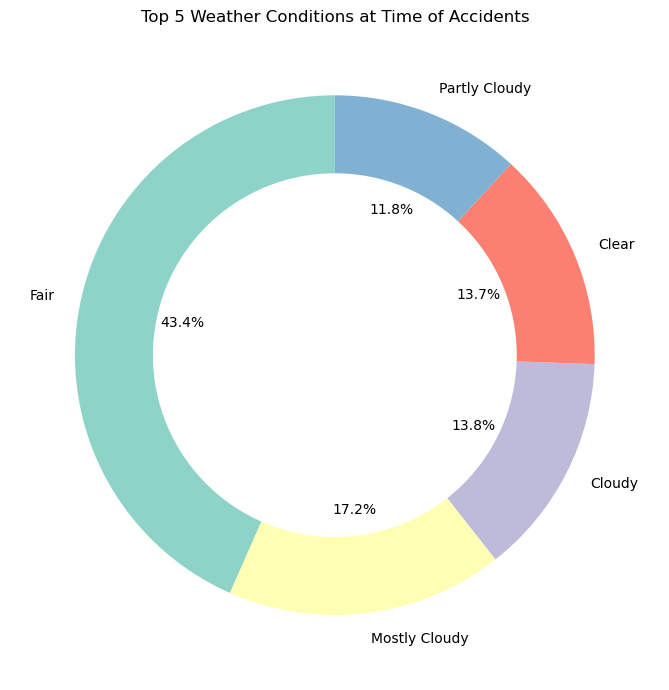

In [20]:
top_weather_counts = df_clean['Weather_Condition'].value_counts().head(5)

fig, ax = plt.subplots(figsize=(7, 7))
wedges, texts, autotexts = ax.pie(top_weather_counts, labels=top_weather_counts.index,
                                  autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3.colors)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Top 5 Weather Conditions at Time of Accidents')
plt.tight_layout()
plt.show()


## 📌 Overall Conclusion  

### 🔍 Key Insights  
- The highest number of accidents occurs during morning rush (6 AM - 9 AM) and evening (3 PM - 6 PM).  
- Most accidents happen on weekdays, peaking on Fridays.  
- Temperature during most accidents clusters around **50-80°F**.  
- Top weather conditions contributing to accidents include **Clear, Overcast, Rain, and Mostly Cloudy**.  
- Heatmaps and Folium visualizations identify accident hotspots, particularly in dense traffic regions like **Los Angeles, Houston, and Charlotte**.  

# 📊 Additional Data Visualizations

# 2D Density Heatmap using Seaborn
This creates a heatmap of accident concentrations by latitude and longitude using kernel density estimation.

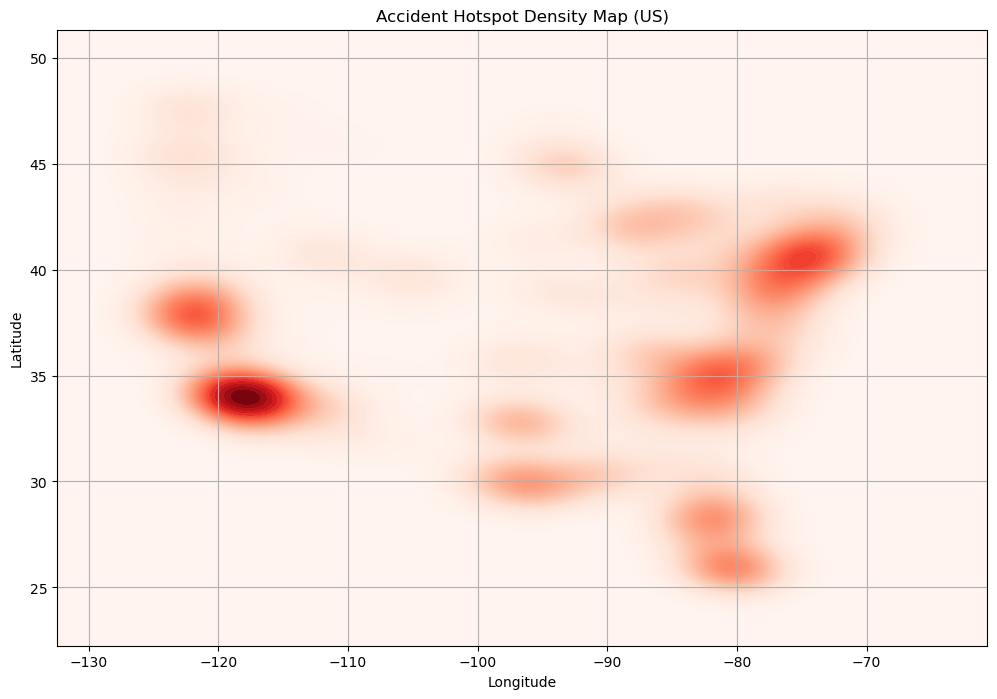

In [24]:
# Sample a smaller dataset for performance
sample_df = df_clean.sample(int(0.01 * len(df_clean)))

# Plot density heatmap
plt.figure(figsize=(12, 8))
sns.kdeplot(
    x=sample_df['Start_Lng'], 
    y=sample_df['Start_Lat'],
    cmap="Reds", 
    fill=True, 
    thresh=0, 
    levels=100
)
plt.title('Accident Hotspot Density Map (US)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


# 📍 Alternative 2: Hexbin Plot with Matplotlib
A hexbin plot groups points into hexagonal bins, which works great for geographical clustering.

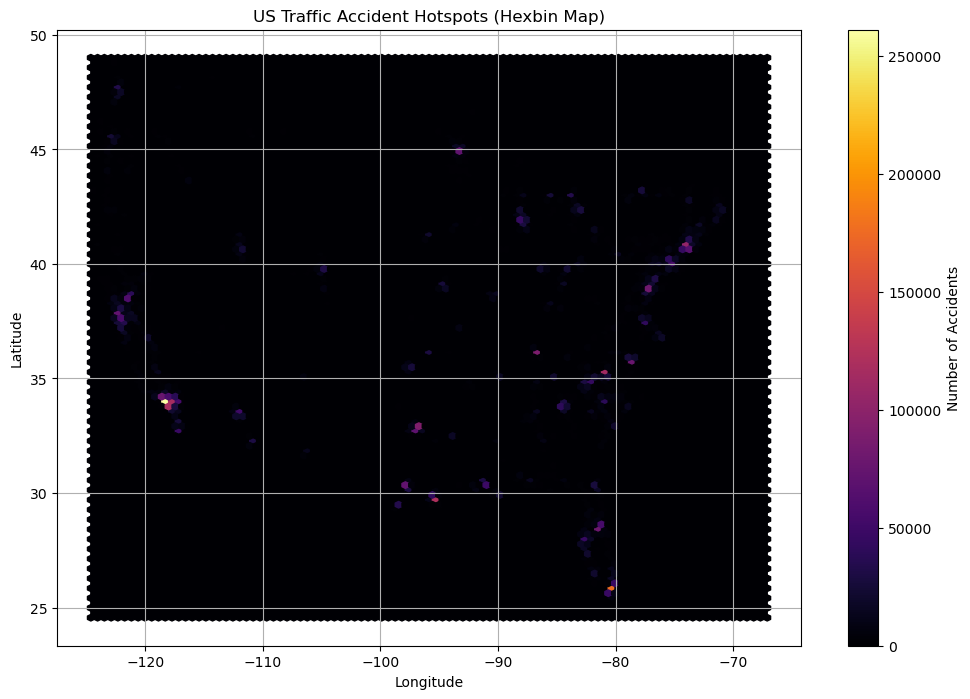

In [22]:
plt.figure(figsize=(12, 8))
plt.hexbin(
    df_clean['Start_Lng'], 
    df_clean['Start_Lat'], 
    gridsize=100, 
    cmap='inferno'
)
plt.colorbar(label='Number of Accidents')
plt.title('US Traffic Accident Hotspots (Hexbin Map)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


# 📍 Alternative 3: Scatter Plot on US Map Outline
If you want to approximate a background map outline, you can overlay scatter points.

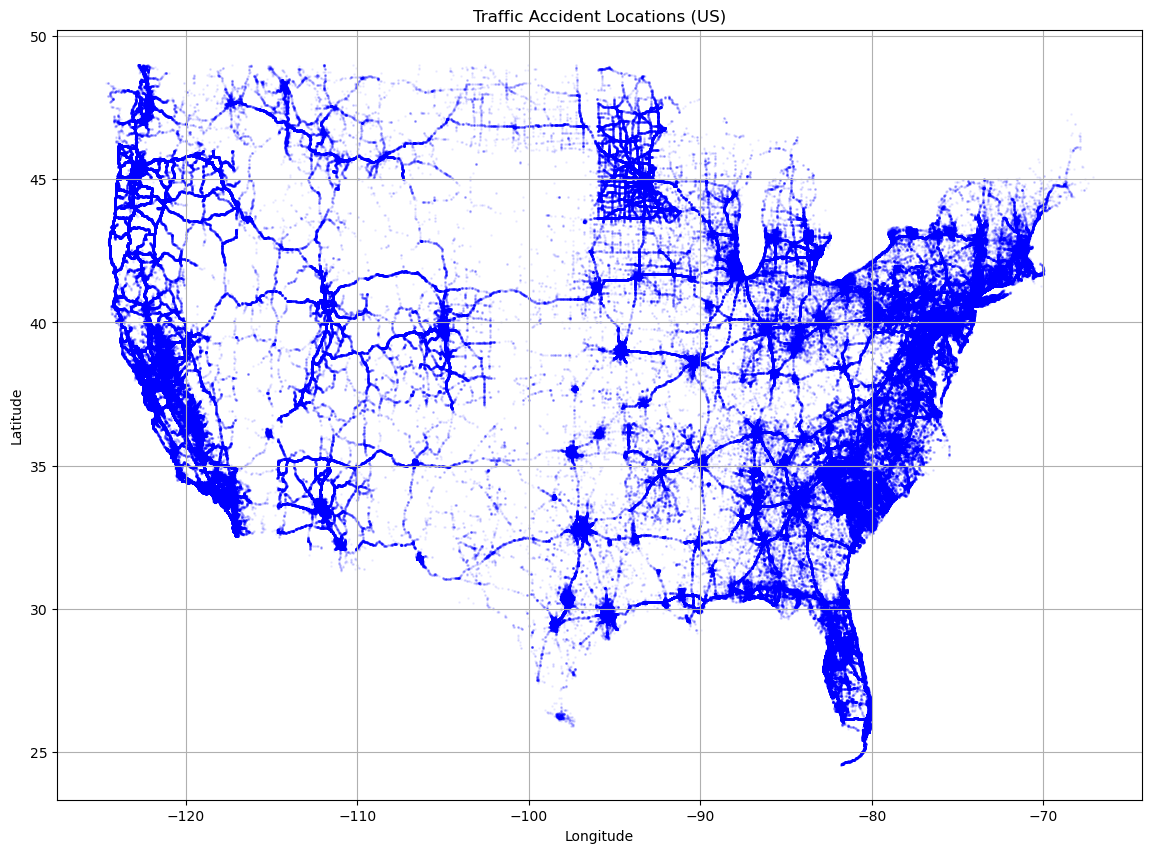

In [23]:
plt.figure(figsize=(14, 10))
plt.scatter(
    df_clean['Start_Lng'], 
    df_clean['Start_Lat'], 
    s=1, 
    alpha=0.05, 
    color='blue'
)
plt.title('Traffic Accident Locations (US)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


# 📊 Additional Visualization Ideas for Traffic Accident Analysis

# 📈 1️⃣ Accidents by State — Horizontal Bar Chart
Shows which states have the highest accident counts.

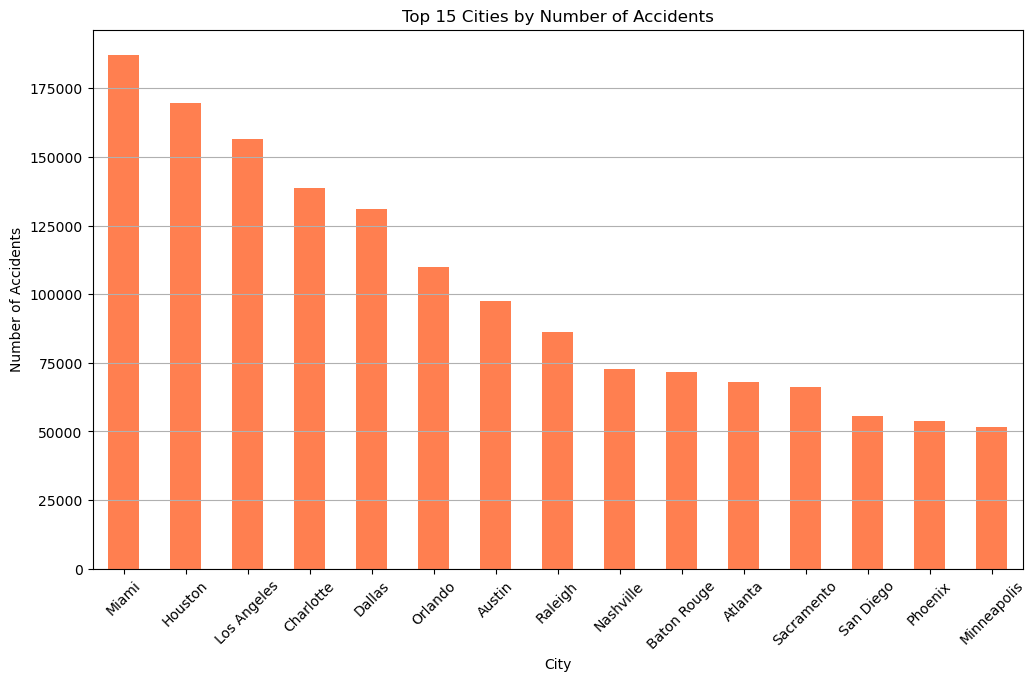

In [28]:
# Top 15 cities by accident count
city_counts = df_clean['City'].value_counts().head(15)

plt.figure(figsize=(12, 7))
city_counts.plot(kind='bar', color='coral')
plt.title('Top 15 Cities by Number of Accidents')
plt.xlabel('City')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


# 📊 2️⃣ Accidents by Severity
Visualizing how accident severity is distributed.

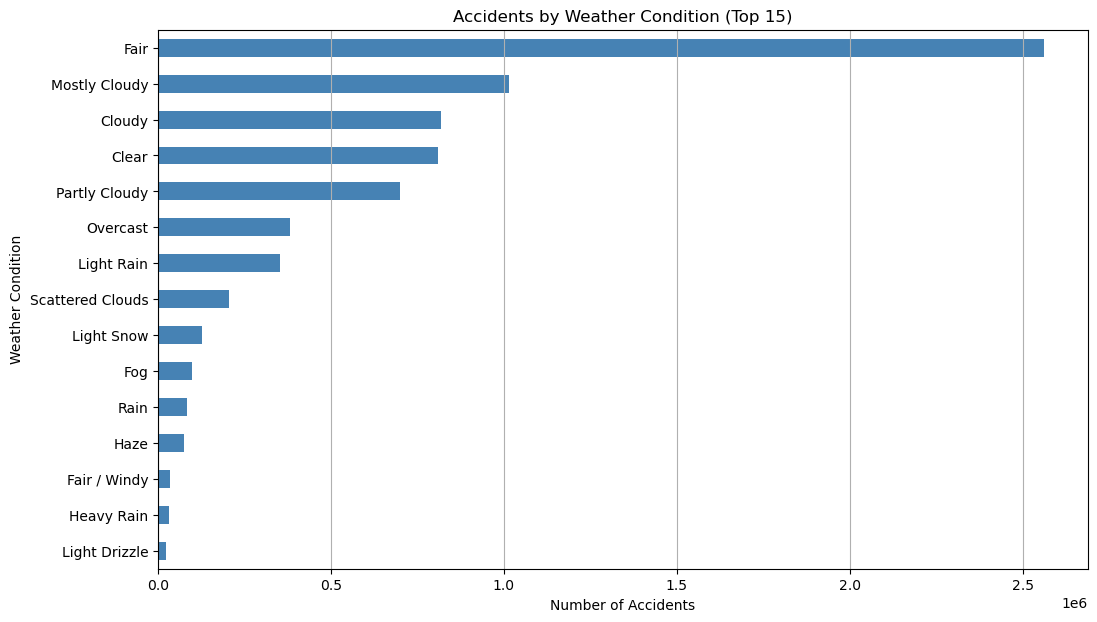

In [30]:
# Count accidents by weather condition
weather_counts = df_clean['Weather_Condition'].value_counts().head(15)

plt.figure(figsize=(12, 7))
weather_counts.plot(kind='barh', color='steelblue')
plt.title('Accidents by Weather Condition (Top 15)')
plt.xlabel('Number of Accidents')
plt.ylabel('Weather Condition')
plt.gca().invert_yaxis()  # Highest at top
plt.grid(axis='x')
plt.show()


# 📊 3️⃣ Hourly Accident Trend
See at what times accidents occur most often.

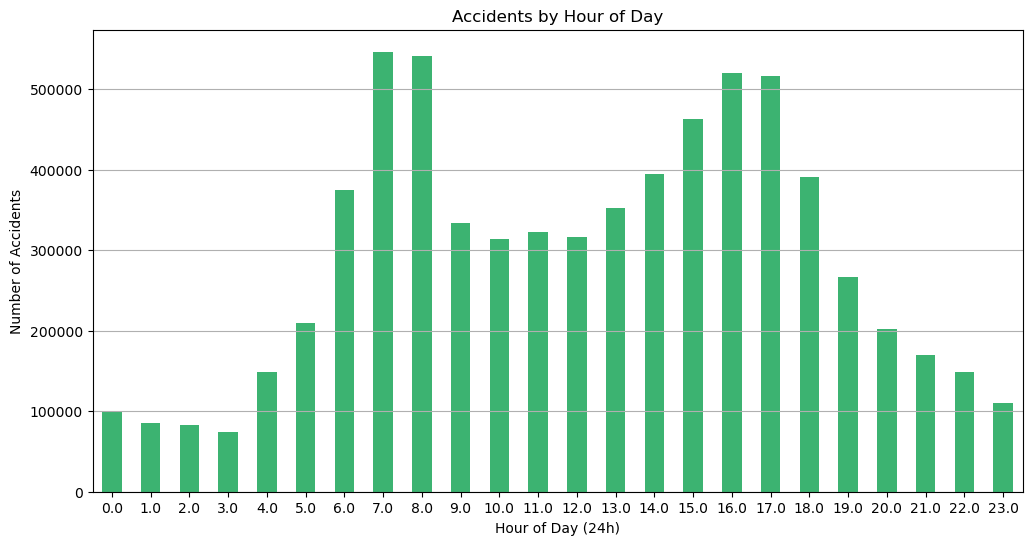

In [31]:
# Convert Start_Time to datetime if not already
df_clean['Start_Time'] = pd.to_datetime(df_clean['Start_Time'])

# Extract hour
df_clean['Hour'] = df_clean['Start_Time'].dt.hour

# Count accidents per hour
hour_counts = df_clean['Hour'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
hour_counts.plot(kind='bar', color='mediumseagreen')
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour of Day (24h)')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


# Temperature Distribution of Accidents

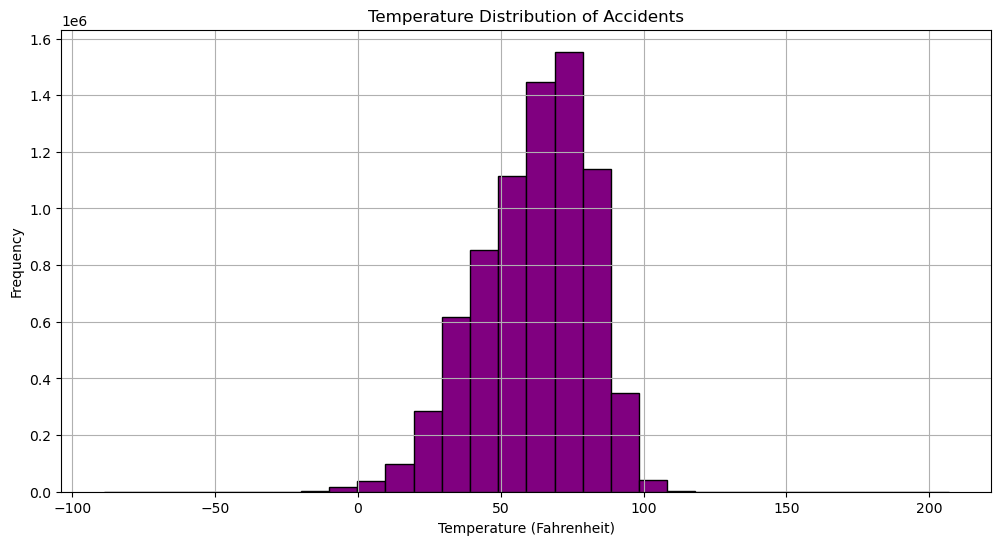

In [32]:
plt.figure(figsize=(12,6))
plt.hist(df_clean['Temperature(F)'].dropna(), bins=30, color='purple', edgecolor='black')
plt.title('Temperature Distribution of Accidents')
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
